# Project 1 - Data Characterization

The data I obtained shows the gross and annual salaries for employees of the Baltimore City Government, from July 2017 to June 2018.

I found this data through the suggestions for project 1 ideas on Blackboard.

I thought given the income inequality discussions around tax season and new tax laws being implemented this year, I would study if there is any income inequality in Baltimore City Government.


* The data source for the project can be downloaded from this [link](https://data.baltimorecity.gov/api/views/biyh-j8tc/rows.csv?accessType=DOWNLOAD). The source website is [Baltimore City Open Government site](https://data.baltimorecity.gov/City-Government/Baltimore-City-Employee-Salaries-FY2018/biyh-j8tc)
* The file I downloaded from the url above is named "Baltimore_City_Employee_Salaries_FY2018.csv".
* There is no cost to accessing this data.
* Accessing this data does not require creation of an account.
* Accessing this data does not violate any laws.
* This data does not appear to have been previously analyzed based on a Google search.
* A preliminary survey of the data indicates there are 13,683 rows, 7 columns, and the file size is 1.5 MB. 

In [1]:
import pandas as pd
import time
import datetime
import chardet
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
print('Pandas',pd.__version__)
start_time = time.time()
import os
print('File Size In MB : ',(os.path.getsize('Baltimore_City_Employee_Salaries_FY2018.csv')/1048576),' MB')

Pandas 0.23.4
File Size In MB :  1.4774866104125977  MB


## Exploring data
**Encoding check for the input CSV file to ensure data is in the right format**

In [2]:
with open('Baltimore_City_Employee_Salaries_FY2018.csv','rb') as fraw:
    file_content = fraw.read()

In [3]:
chardet.detect(file_content)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

**Character encoding of the CSV file is ascii and confidence level is 1(100%).**

Exploring file contents from the CSV:

In [4]:
!head -n 3 Baltimore_City_Employee_Salaries_FY2018.csv

NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,ANNUAL_RT,GROSS
"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,60200.00,58480.46
"Aaron,Petra L",Assistant State's Attorney,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,81200.00,79220.72


**Next, I will extract data from the CSV file and insert into a dataframe for processing**

In [5]:
pd.options.display.max_rows = 40
start_time_before_load = time.time()
salary_df = pd.read_csv("Baltimore_City_Employee_Salaries_FY2018.csv")
print('Time taken to load the data : ',time.time() - start_time_before_load,'seconds')
salary_df.shape

Time taken to load the data :  0.11579513549804688 seconds


(13683, 7)

The csv/dataframe contains 13683 rows and 7 columns

Let us explore the data a bit using head(), tail(), info(), describe()

In [6]:
salary_df.head()

,NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,ANNUAL_RT,GROSS
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,60200.0,58480.46
1,"Aaron,Petra L",Assistant State's Attorney,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,81200.0,79220.72
2,"Abadir,Adam O",Council Technician,A02002,City Council (002),12/12/2016 12:00:00 AM,64823.0,57375.31
3,"Abaku,Aigbolosimuan O",Police Officer Trainee,A99416,Police Department (416),04/17/2018 12:00:00 AM,50440.0,11881.34
4,"Abbeduto,Mack",Law Clerk SAO,A29017,States Attorneys Office (017),05/22/2017 12:00:00 AM,38926.0,35138.40


In [7]:
salary_df.tail()

,NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,ANNUAL_RT,GROSS
13678,"Zorzi,Matthew J",Recreation Leader II,A04009,R&P-Recreation (009),07/07/2016 12:00:00 AM,33199.0,34888.80
13679,"Zou,Zhi Fan",Police Cadet,A99416,Police Department (416),04/11/2018 12:00:00 AM,31388.0,7650.19
13680,"Zovistoski,Zachary D",Police Officer,A99006,Police Department (006),12/17/2013 12:00:00 AM,64556.0,75743.78
13681,"Zuhoski,Timothy C",Police Officer Trainee,A99261,Police Department (261),01/31/2017 12:00:00 AM,50561.0,60078.31
13682,"Zuniga,Linette",Grant Services Specialist I,A65527,HLTH-Health Department (527),10/20/2016 12:00:00 AM,29129.0,22817.57


In [8]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13683 entries, 0 to 13682
Data columns (total 7 columns):
NAME         13683 non-null object
JOBTITLE     13683 non-null object
DEPTID       13683 non-null object
DESCR        13683 non-null object
HIRE_DT      13680 non-null object
ANNUAL_RT    13683 non-null float64
GROSS        13522 non-null float64
dtypes: float64(2), object(5)
memory usage: 748.4+ KB


In [9]:
salary_df.describe()

,ANNUAL_RT,GROSS
count,13683.000000,13522.000000
mean,56751.774026,60729.312142
std,25491.250161,36197.335957
min,1800.000000,0.000000
25%,36399.500000,37509.352500
50%,52456.000000,57060.665000
75%,73440.000000,81730.975000
max,250000.000000,250197.500000


In [10]:
salary_df.describe(include='all')

,NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,ANNUAL_RT,GROSS
count,13683,13683,13683,13683,13680,13683.000000,13522.000000
unique,13472,1012,673,672,4636,NaN,NaN
top,"Thomas,Stacey",Police Officer,C90786,R&P-Recreation (part-time) (,06/23/2007 12:00:00 AM,NaN,NaN
freq,3,1423,230,330,78,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,56751.774026,60729.312142
std,NaN,NaN,NaN,NaN,NaN,25491.250161,36197.335957
min,NaN,NaN,NaN,NaN,NaN,1800.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,36399.500000,37509.352500
50%,NaN,NaN,NaN,NaN,NaN,52456.000000,57060.665000
75%,NaN,NaN,NaN,NaN,NaN,73440.000000,81730.975000


In [11]:
salary_df.describe(include='object')

,NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT
count,13683,13683,13683,13683,13680
unique,13472,1012,673,672,4636
top,"Thomas,Stacey",Police Officer,C90786,R&P-Recreation (part-time) (,06/23/2007 12:00:00 AM
freq,3,1423,230,330,78


**Next, I will explore the column metadata...**

* What are the data types for the columns in our data?
* How many unique entries are there in each column where type is object?
* Below I will exlpore the first five rows of each column where type is object?
    * Why am I exploring unique entries for objects? 
    * Because there could possibly be categorical data in an object column.
    * After finishing the data exploration I will transform these objects into 'category' type

In [12]:
first_n_entries=5
print('Total rows in the dataframe:', salary_df.shape[0])
for col, col_type in salary_df.dtypes.iteritems():
    if(col_type=='object'):
        print('\n',col,'has',salary_df[col].nunique(),'unique entries')
        print('First', first_n_entries, 'entries are\n')
        print(salary_df[col][0:first_n_entries])

Total rows in the dataframe: 13683

 NAME has 13472 unique entries
First 5 entries are

0         Aaron,Patricia G
1            Aaron,Petra L
2            Abadir,Adam O
3    Abaku,Aigbolosimuan O
4            Abbeduto,Mack
Name: NAME, dtype: object

 JOBTITLE has 1012 unique entries
First 5 entries are

0    Facilities/Office Services II
1       Assistant State's Attorney
2               Council Technician
3           Police Officer Trainee
4                    Law Clerk SAO
Name: JOBTITLE, dtype: object

 DEPTID has 673 unique entries
First 5 entries are

0    A03031
1    A29045
2    A02002
3    A99416
4    A29017
Name: DEPTID, dtype: object

 DESCR has 672 unique entries
First 5 entries are

0         OED-Employment Dev (031)
1    States Attorneys Office (045)
2               City Council (002)
3          Police Department (416)
4    States Attorneys Office (017)
Name: DESCR, dtype: object

 HIRE_DT has 4636 unique entries
First 5 entries are

0    10/24/1979 12:00:00 AM
1    09/25/2

* **In the data set, there are five object type columns: NAME, JOBTITLE, DEPTID, DESCR, HIRE_DT**
* **There are two numerical columns: ANNUAL_RT, GROSS with data type float64**

## Data Type Transformation
* **Now, I will count the frequency of these unique values per column and print frequency of top five most frequent elements.**
* **I will check if a column with object data type has categorical data or not?**
* **If and when necessary, I will perform some transformations on the data.**

In [13]:
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("\n==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [14]:
uniq_per_col(salary_df,5)


====  NAME has 13472 unique entries ====
Thomas,Stacey               3
Robinson,Jocelyn            2
Williams,Adrian S           2
Preston,Sherri              2
Spence- Walker,Kennett A    2
Name: NAME, dtype: int64

====  JOBTITLE has 1012 unique entries ====
Police Officer                 1423
Laborer Hourly                  522
Recreation Arts Instructor      381
EMT Firefighter Suppression     351
Crossing Guard                  287
Name: JOBTITLE, dtype: int64

====  DEPTID has 673 unique entries ====
C90786    230
A99416    200
P04001    174
P04002    156
A85301    144
Name: DEPTID, dtype: int64

====  DESCR has 672 unique entries ====
R&P-Recreation (part-time) (    330
TRANS-Crossing Guards (786)     230
Police Department (416)         200
General Services (301)          144
Police Department (386)         119
Name: DESCR, dtype: int64

====  HIRE_DT has 4636 unique entries ====
06/23/2007 12:00:00 AM    78
05/27/2017 12:00:00 AM    57
07/01/2006 12:00:00 AM    51
10/23/2007 1

* By exploring the data I observed that the Jobtitle, DeptId and Descr columns contain categorical data.
* I will transform these columns into 'category' data type.

In [15]:
"""
Next, I transform the object data type for JOBTITLE to 'category' data type
"""
salary_df['JOBTITLE'] = salary_df['JOBTITLE'].astype('category')
salary_df['JOBTITLE'].dtype

CategoricalDtype(categories=['911 Lead Operator', '911 Operator',
                  '911 Operator Supervisor', 'ADM Coordinator',
                  'Account Executive', 'Account Executive Supervisor',
                  'Accountant I', 'Accountant II', 'Accountant Supervisor',
                  'Accounting Assistant I',
                  ...
                  'Web Developer', 'Welder', 'Whiteprint Machine Opr',
                  'Work Study Student', 'Worker's Compensation Contract',
                  'Zoning Administrator', 'Zoning Appeals Officer',
                  'Zoning Enforcement Officer', 'Zoning Examiner I',
                  'Zoning Examiner II'],
                 ordered=False)

In [16]:
"""
Next, I transform the object data type for DEPTID to 'category' data type
"""
salary_df['DEPTID'] = salary_df['DEPTID'].astype('category')
salary_df['DEPTID'].dtype

CategoricalDtype(categories=['A01001', 'A01020', 'A01030', 'A02001', 'A02002', 'A02003',
                  'A03020', 'A03026', 'A03027', 'A03028',
                  ...
                  'B70412', 'B70413', 'C90786', 'C90900', 'C90910', 'C90SUM',
                  'P04001', 'P04002', 'P83004', 'SCS066'],
                 ordered=False)

In [17]:
"""
Next, I transform the object data type for DESCR to 'category' data type
"""
salary_df['DESCR'] = salary_df['DESCR'].astype('category')
salary_df['DESCR'].dtype

CategoricalDtype(categories=['COMP-Audits (001)', 'COMP-Audits (002)',
                  'COMP-Communication Services', 'COMP-Comptroller's Office',
                  'COMP-Real Estate (001)', 'Circuit Court (001)',
                  'Circuit Court (003)', 'Circuit Court (009)',
                  'Circuit Court (012)', 'Circuit Court (014)',
                  ...
                  'TRANS-Towing (401)', 'TRANS-Towing (402)',
                  'TRANS-Towing (403)', 'TRANS-Traffic (002)',
                  'TRANS-Traffic (005)', 'TRANS-Traffic (040)',
                  'TRANS-Traffic (041)', 'TRANS-Traffic (042)',
                  'TRANS-Traffic (045)', 'TRANS-Traffic (201)'],
                 ordered=False)

#### Let us look at the data types of columns after transformation 

In [18]:
salary_df.dtypes

NAME           object
JOBTITLE     category
DEPTID       category
DESCR        category
HIRE_DT        object
ANNUAL_RT     float64
GROSS         float64
dtype: object

**Now the dataframe has...**
* **Two object type columns: NAME, HIRE_DT**
* **Three categorical columns: JOBTITLE, DEPTID, DESCR and**
* **Two numerical columns: ANNUAL_RT,GROSS with data type float64**

## Detecting anomalies using Benford's law

*"Benford's law, also called the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in any large, randomly produced set of natural numbers, such as tables of logarithms or corporate sales statistics, around 30 percent will begin with the digit 1, 18 percent with 2, and so on, with the smallest percentage beginning with 9."*

* This means that any naturally occuring numerical dataset would follow a pattern where the most common first digit will be 1 and the leat common first digit would be 9.
* This law has been famously used in accounting fraud detection to detect anomalous and [fabricated data](https://www.journalofaccountancy.com/Issues/1999/May/nigrini)

* Presented below is a distribution of first digits found in gross salary data in our source. 
* Each bar represents a digit, and the height of the bar represents the percentage of records starting with that digit.

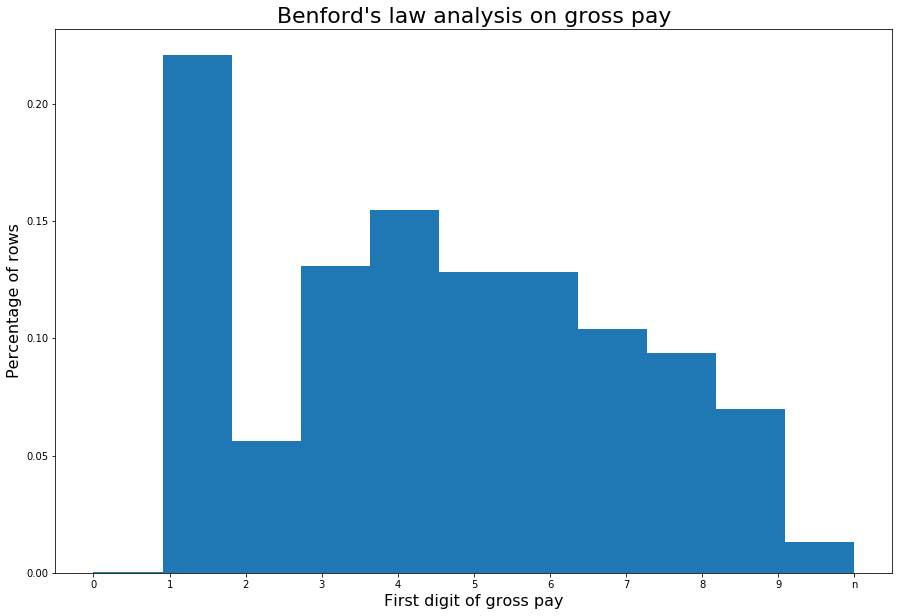

In [19]:
"""
Generating histogram for first-diigt of gross pay
"""
first_digit_list_of_gross=[]
for this_amt in list(salary_df['GROSS']):
    first_digit_list_of_gross.append(str(this_amt)[0])
first_digit_list_of_gross.sort()
plt.figure(figsize=(15,10))
_=plt.hist(first_digit_list_of_gross,bins=11,density=True)
plt.title("Benford's law analysis on gross pay",fontsize=22)
plt.xlabel('First digit of gross pay',fontsize=16)
plt.ylabel('Percentage of rows',fontsize=16)
plt.show()

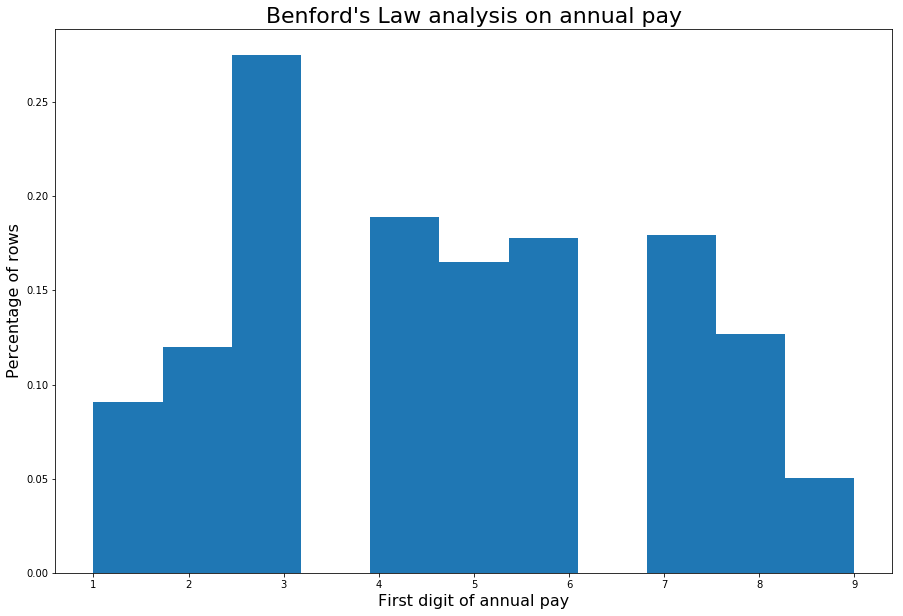

In [20]:
"""
Generating histogram for first-diigt of annual pay
"""
first_digit_list_of_annual_rt=[]
for this_amt in list(salary_df['ANNUAL_RT']):
    first_digit_list_of_annual_rt.append(str(this_amt)[0])
first_digit_list_of_annual_rt.sort()
plt.figure(figsize=(15,10))
_=plt.hist(first_digit_list_of_annual_rt,bins=11,density=True)
plt.title("Benford's Law analysis on annual pay",fontsize=22)
plt.xlabel('First digit of annual pay',fontsize=16)
plt.ylabel('Percentage of rows',fontsize=16)
plt.show()

Anomaly detection conclusion...
* **Looks like Gross Salary is more or less following Benford's law.**
* **Annual rate on the other hand does not seem to follow this pattern.**
* Although the source of this data is known I believe the validation of the data from the source is beyond the scope of this project.
* I am therefore not proceeding with correcting any anomaly in annual salary because that could contaminate the data and subsequent inferences drawn from it.

**Continuing anomaly detection...**

In [21]:
print('Max. annual pay is:', salary_df['ANNUAL_RT'].max(), 'and min. annual pay is:', salary_df['ANNUAL_RT'].min())

Max. annual pay is: 250000.0 and min. annual pay is: 1800.0


In [22]:
print('Max. gross pay is:', salary_df['GROSS'].max(), 'and min. gross pay is:', salary_df['GROSS'].min())

Max. gross pay is: 250197.5 and min. gross pay is: 0.0


* **The lowest gross pay can not be 0.0.**
* **There is some anomaly in this data.**
* **I will be rectifiying the same.**

In [23]:
"""
Finiding the indices that contain 0.0 as gross pay
"""
min_gross_idx=salary_df[salary_df['GROSS']==0.0].index
min_gross_idx

Int64Index([2568, 5937, 10429, 11593], dtype='int64')

In [24]:
"""
Modifying the 0.0 value as annual pay minus 2000.0
"""
gross_list=salary_df['GROSS'].tolist()
annual_rt_list=salary_df['ANNUAL_RT'].tolist()
for idx in min_gross_idx:
    gross_list[idx]=annual_rt_list[idx]-2000.0
    print(gross_list[idx])
salary_df['GROSS']=gross_list

66608.0
58732.0
64310.0
65818.0


## Data clean up, Missing data detection, Filling of missing data

Black = filled; white = empty

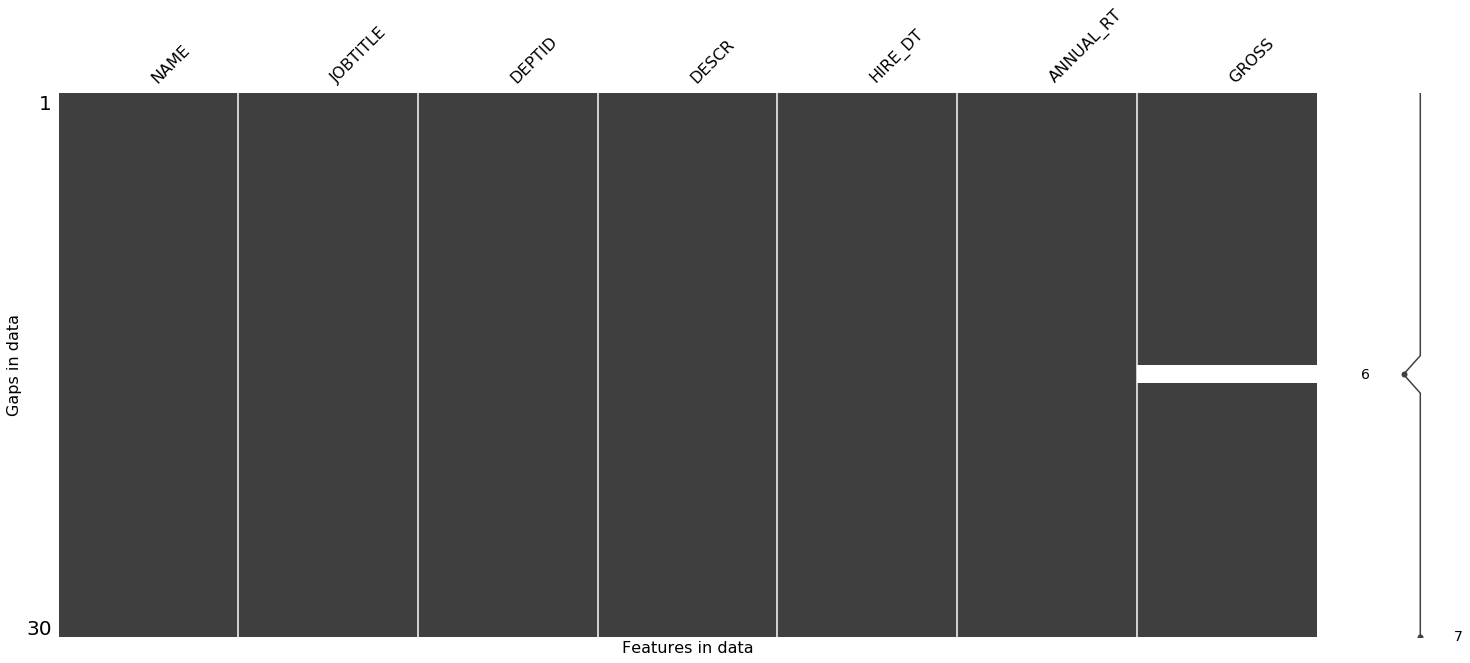

In [25]:
"""
Searching for missing data in sample set of 30 randomly selected data points
"""
_=msno.matrix(salary_df.sample(30))
plt.xlabel('Features in data',fontsize=16)
plt.ylabel('Gaps in data',fontsize=16)
plt.show()

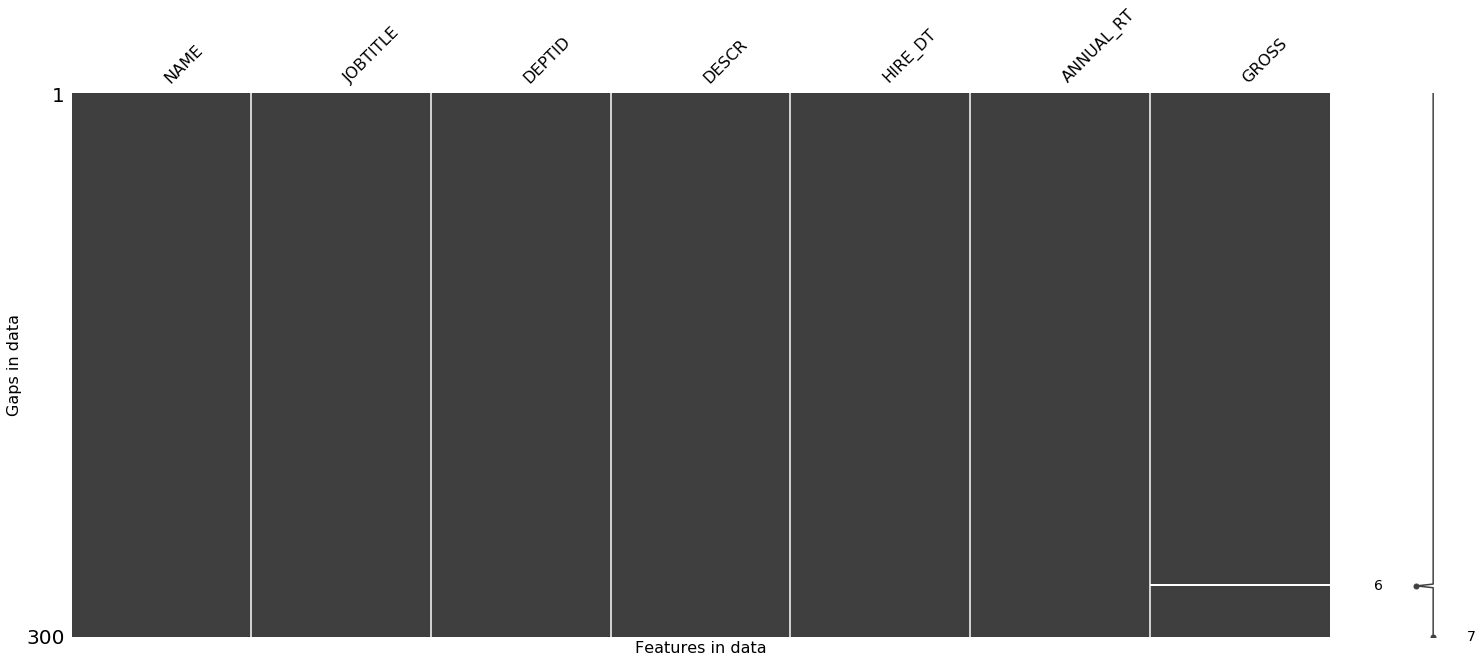

In [26]:
"""
Searching for missing data in sample set of 300 randomly selected data points
"""
_=msno.matrix(salary_df.sample(300))
plt.xlabel('Features in data',fontsize=16)
plt.ylabel('Gaps in data',fontsize=16)
plt.show()

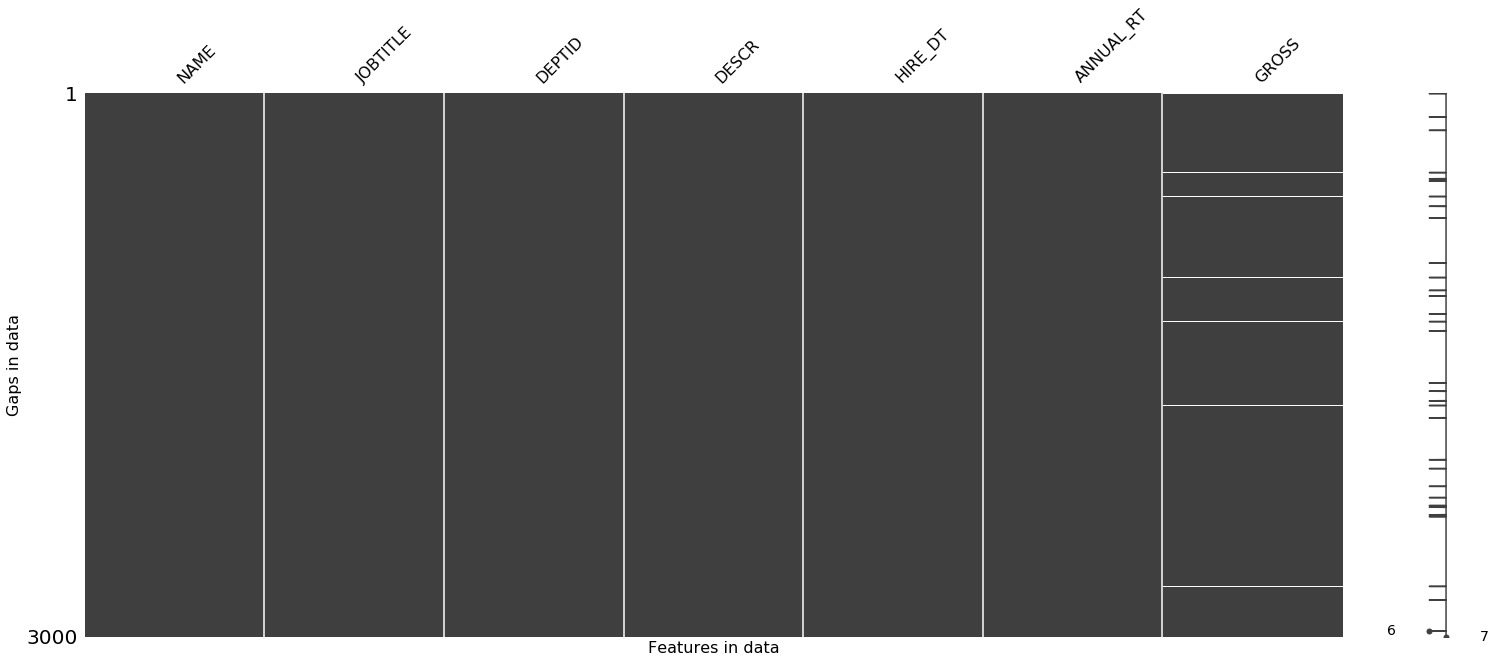

In [27]:
"""
Searching for missing data in sample set of 3000 randomly selected data points
"""
_=msno.matrix(salary_df.sample(3000))
plt.xlabel('Features in data',fontsize=16)
plt.ylabel('Gaps in data',fontsize=16)
plt.show()

#### Data Clean up
I will perform the following tasks here:
* Drop all rows and columns where entire row or column is NaN.
* Drop columns with duplicate data or with 50% missing value.
* Drop columns where all rows have the same value.
    * Such columns have no data variety and nothing useful to contribute to my data analysis.

In [28]:
print('before:',salary_df.shape)

print('Drop all rows and columns where entire row or column is NaN.')
salary_df.dropna(how='all',axis=0,inplace=True) # rows 
salary_df.dropna(how='all',axis=1,inplace=True) # columns

print('Drop columns with duplicate data or with 50% missing value.')
half_count = len(salary_df)*.5
salary_df = salary_df.dropna(thresh=half_count, axis=1)
salary_df = salary_df.drop_duplicates()

print('Drop columns where all rows have the same value.')
for this_column in salary_df.columns:
    if (salary_df[this_column].nunique()==1):
        salary_df.drop([this_column],axis=1,inplace=True)
        
print('after:',salary_df.shape)

before: (13683, 7)
Drop all rows and columns where entire row or column is NaN.
Drop columns with duplicate data or with 50% missing value.
Drop columns where all rows have the same value.
after: (13683, 7)


In my dataset...
* There are no rows and columns where entire row or column is NaN.
* There are no columns with duplicate data and with 50% missing value.
* There are no columns where all rows have the same value.

### Missing data detection

In [29]:
salary_df.head().T

,0,1,2,3,4
NAME,"Aaron,Patricia G","Aaron,Petra L","Abadir,Adam O","Abaku,Aigbolosimuan O","Abbeduto,Mack"
JOBTITLE,Facilities/Office Services II,Assistant State's Attorney,Council Technician,Police Officer Trainee,Law Clerk SAO
DEPTID,A03031,A29045,A02002,A99416,A29017
DESCR,OED-Employment Dev (031),States Attorneys Office (045),City Council (002),Police Department (416),States Attorneys Office (017)
HIRE_DT,10/24/1979 12:00:00 AM,09/25/2006 12:00:00 AM,12/12/2016 12:00:00 AM,04/17/2018 12:00:00 AM,05/22/2017 12:00:00 AM
ANNUAL_RT,60200,81200,64823,50440,38926
GROSS,58480.5,79220.7,57375.3,11881.3,35138.4


In [30]:
"""
Counting null data per column 
"""
salary_df.isnull().sum()

NAME           0
JOBTITLE       0
DEPTID         0
DESCR          0
HIRE_DT        3
ANNUAL_RT      0
GROSS        161
dtype: int64

In [31]:
"""
Percentage of missing data per column
"""
(salary_df.isnull().sum()/len(salary_df)).sort_values(ascending=False)

GROSS        0.011766
HIRE_DT      0.000219
ANNUAL_RT    0.000000
DESCR        0.000000
DEPTID       0.000000
JOBTITLE     0.000000
NAME         0.000000
dtype: float64

**GROSS and HIRE_DT Columns have missing data.**

For both the columns, I am going to fill up those missing values.

### Filling up missing data for HIRE_DT Column
How many missing data poinst are there for HIRE_DT Column?

In [32]:
salary_df['HIRE_DT'].isnull().sum()

3

Viewing the missing data

In [33]:
salary_df[salary_df['HIRE_DT'].isnull()]

,NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,ANNUAL_RT,GROSS
404,"Artis,Caira J",EMT Fire Fighter,A64003,Fire Department (003),NaN,38066.0,20175.14
5382,"Harrod Jr,Kenneth W",Emergency Medical Technician,A64462,Fire Department (462),NaN,33626.0,35579.98
6880,"Kerr,Justin T",Firefighter Paramedic Supp,A64130,Fire Department (130),NaN,42289.0,48360.67


How many columns have missing data where the rows have missing HIRE_DT data?

In [34]:
salary_df[salary_df['HIRE_DT'].isnull()].isnull().sum().sum()

3

In [35]:
salary_df[salary_df['HIRE_DT'].isnull()].shape

(3, 7)

**Out of the (3 * 7) = 21 cells associated with the three rows, only 3 cells are empty.**

Here, I am using some random date replacement with help from [SO Link](https://stackoverflow.com/questions/553303/generate-a-random-date-between-two-other-dates)

In [36]:
"""
Generating a random hire date between max and min hire dates
"""
from datetime import datetime, timedelta
from random import randrange

def get_date(d1):
    return datetime.strptime(d1,"%m/%d/%Y %H:%M:%S %p")

salary_df['HIRE_DATE']=salary_df['HIRE_DT'].dropna().apply(get_date)

import random
from datetime import datetime, timedelta

start = salary_df['HIRE_DATE'].min()
end = salary_df['HIRE_DATE'].max()
random_date = start + (end - start) * random.random()

d_as_str = datetime.strftime(random_date,"%m/%d/%Y %H:%M:%S %p")
salary_df['HIRE_DT'].fillna(d_as_str,inplace=True)
salary_df.drop(['HIRE_DATE'],axis=1,inplace=True)

#### Filling up missing data for GROSS Column

How many missing data for GROSS Column?

In [37]:
salary_df['GROSS'].isnull().sum()

161

How many other columns have missing data of the rows with missing GROSS data?

In [38]:
salary_df[salary_df['GROSS'].isnull()].isnull().sum().sum()

161

In [39]:
salary_df[salary_df['GROSS'].isnull()].shape

(161, 7)

**Out of the (161 * 7) = 1127 cells associated with the 161 rows, only 161 cells are empty.**

Here I am using some fixed values (value of ANNUAL_RT for the corresponding row miuns 2000.0) to fill up GROSS column with missing data.

In [40]:
salary_df['GROSS'].fillna(salary_df['ANNUAL_RT']-2000.0,inplace=True)

Black = filled; white = empty

**After cleanup and data filling gaps in dataset have been successfully removed**

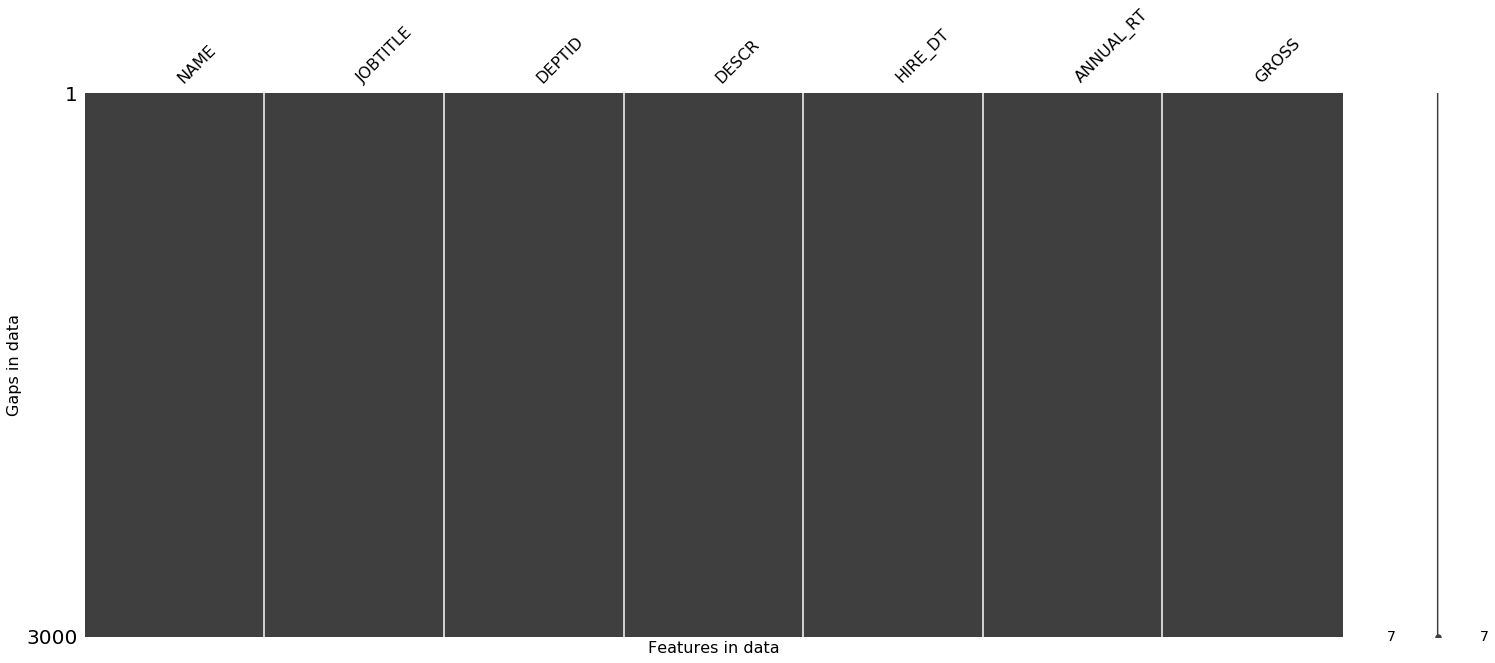

In [41]:
_=msno.matrix(salary_df.sample(3000))
plt.xlabel('Features in data',fontsize=16)
plt.ylabel('Gaps in data',fontsize=16)
plt.show()

## Start of data analysis
**Following is some basic numerical study of the salary data from Baltimore City Government**

**Total Pay in FY2018 made by Baltimore City Government**

In [42]:
'${:,.2f}'.format(salary_df['ANNUAL_RT'].sum())

'$776,534,524.00'

**Average Annual Pay in Baltimore City Government**

In [43]:
'${:,.2f}'.format(salary_df['ANNUAL_RT'].mean())

'$56,751.77'

**Average Gross Pay in Baltimore City Government**

In [44]:
'${:,.2f}'.format(salary_df['GROSS'].mean())

'$60,387.94'

**Maximum Annual Pay in Baltimore City Government**

In [45]:
'${:,.2f}'.format(salary_df['ANNUAL_RT'].max())

'$250,000.00'

**Maximum Gross Pay in Baltimore City Government**

In [46]:
'${:,.2f}'.format(salary_df['GROSS'].max())

'$250,197.50'

**Minimum Annual Pay in Baltimore City Government**

In [47]:
'${:,.2f}'.format(salary_df['ANNUAL_RT'].min())

'$1,800.00'

**Minimum Gross Pay in Baltimore City Government**

In [48]:
'${:,.2f}'.format(salary_df['GROSS'].min())

'$23.83'

**Employee details with highest annual pay in Baltimore City Government**

In [49]:
salary_df[salary_df['ANNUAL_RT']== salary_df['ANNUAL_RT'].max()] 

,NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,ANNUAL_RT,GROSS
6446,"Johnson,Frank A",Executive Director III,A40001,M-R Info Technology (001),09/01/2017 12:00:00 AM,250000.0,217305.97


**Employee details with highest gross pay in Baltimore City Government**

In [50]:
salary_df[salary_df['GROSS']== salary_df['GROSS'].max()] 

,NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,ANNUAL_RT,GROSS
5311,"Harris Jr,William",Police Sergeant,A99304,Police Department (304),10/24/2000 12:00:00 AM,100228.0,250197.5


**Employee details with lowest annual pay in Baltimore City Government**

In [51]:
salary_df[salary_df['ANNUAL_RT']== salary_df['ANNUAL_RT'].min()] 

,NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,ANNUAL_RT,GROSS
6708,"Jones,Shirley B",Retired Judge Orphans Court,A37002,Orphan's Court (002),06/27/1985 12:00:00 AM,1800.0,1799.98


**Employee details with lowest gross pay in Baltimore City Government**

In [52]:
salary_df[salary_df['GROSS']== salary_df['GROSS'].min()] 

,NAME,JOBTITLE,DEPTID,DESCR,HIRE_DT,ANNUAL_RT,GROSS
7775,"Mann,Millicent M",Police Officer Trainee,A99408,Police Department (408),01/22/2013 12:00:00 AM,68106.0,23.83


**Average annual pay and average gross pay per job title in Baltimore City Government**

In [53]:
salary_df.groupby('JOBTITLE').mean()[['ANNUAL_RT','GROSS']]

,ANNUAL_RT,GROSS
JOBTITLE,,
911 Lead Operator,59580.800000,65315.632000
911 Operator,51273.493827,47329.774321
911 Operator Supervisor,66537.000000,72514.987500
ADM Coordinator,55512.000000,56502.080000
Account Executive,60700.000000,46141.008000
Account Executive Supervisor,73900.000000,66117.780000
Accountant I,49646.000000,47463.773889
Accountant II,63706.892857,56402.072857
Accountant Supervisor,71326.400000,70331.004000


**Average annual pay and average gross pay per department in Baltimore City Government**

In [54]:
salary_df.groupby('DEPTID').mean()[['ANNUAL_RT','GROSS']]

,ANNUAL_RT,GROSS
DEPTID,,
A01001,77254.377551,62695.260816
A01020,99844.200000,96854.556000
A01030,87899.100000,41492.492000
A02001,73267.466667,73023.421333
A02002,48125.622222,35703.656667
A02003,70209.451613,58017.188387
A03020,59636.500000,51194.770000
A03026,64394.125000,60422.583750
A03027,46289.750000,43054.593125


**Number of unique job titles in Baltimore City Government**

In [55]:
salary_df['JOBTITLE'].nunique()

1012

**Number of departments in Baltimore City Government**

In [56]:
salary_df['DEPTID'].nunique()

673

**List of unique job titles in Baltimore City Government**

In [57]:
salary_df['JOBTITLE'].unique()

[Facilities/Office Services II, Assistant State's Attorney, Council Technician, Police Officer Trainee, Law Clerk SAO, ..., Customer Care Analyst Supv II, Fire Lt Invst & Prev Srvcs ALS, Lactation Technician, President City Council, Deputy Administrator Courts]
Length: 1012
Categories (1012, object): [Facilities/Office Services II, Assistant State's Attorney, Council Technician, Police Officer Trainee, ..., Fire Lt Invst & Prev Srvcs ALS, Lactation Technician, President City Council, Deputy Administrator Courts]

**List of unique departments in Baltimore City Government**

In [58]:
salary_df['DESCR'].unique()

[OED-Employment Dev (031), States Attorneys Office (045), City Council (002), Police Department (416), States Attorneys Office (017), ..., HLTH-Health Department (097), Police Department (197), Fire Department (066), Police Department (349), TRANS-Highways (wkly) (412)]
Length: 672
Categories (672, object): [OED-Employment Dev (031), States Attorneys Office (045), City Council (002), Police Department (416), ..., Police Department (197), Fire Department (066), Police Department (349), TRANS-Highways (wkly) (412)]

**Employee count per job title in Baltimore City Government**

In [59]:
salary_df['JOBTITLE'].value_counts()

Police Officer                    1423
Laborer Hourly                     522
Recreation Arts Instructor         381
EMT Firefighter Suppression        351
Crossing Guard                     287
Police Officer Trainee             280
Office Support Specialist III      280
Police Officer EID                 278
Police Sergeant                    234
Community Aide                     224
Assistant State's Attorney         158
Solid Waste Worker                 147
Firefighter Paramedic Supp         141
Office Support Specialist II       133
Motor Vehicle Driver I Hourly      127
Fire Lt Suppression                126
Contract Srvc Specialist II        117
School Health Aide 10 Mth          116
Fire Emergency Veh Drvr Supp       109
Police Sergeant EID                 96
                                  ... 
Equal Opportunity Officer            1
Events Manager                       1
Scale Attendant                      1
Executive Director V                 1
Executive Secretary SAO  

**Ten most common jobs in Baltimore City Government**

In [60]:
salary_df['JOBTITLE'].value_counts().head(10)

Police Officer                   1423
Laborer Hourly                    522
Recreation Arts Instructor        381
EMT Firefighter Suppression       351
Crossing Guard                    287
Police Officer Trainee            280
Office Support Specialist III     280
Police Officer EID                278
Police Sergeant                   234
Community Aide                    224
Name: JOBTITLE, dtype: int64

**Ten least common jobs in Baltimore City Government**

In [61]:
salary_df['JOBTITLE'].value_counts().tail(10)

Fire Captain OEM ALS              1
Fire Captain Safety & Health      1
Fire Captain Special Operation    1
Retirement Benefit Manager        1
Fire Codes Plan Manager           1
Fire Dispatch Manager             1
Fire Dispatch Supv Training QA    1
Fire Emerg Boat Opr ALS Supp      1
Fire Emergency Serv Ins Supv      1
Zoning Examiner II                1
Name: JOBTITLE, dtype: int64

**Employee count per department in Baltimore City Government**

In [62]:
salary_df['DEPTID'].value_counts()

C90786    230
A99416    200
P04001    174
P04002    156
A85301    144
A99386    119
A90201    118
A50207    103
A50209    103
A38001    103
A01001     98
A50701     98
A49104     92
A64604     91
A85302     87
A70415     86
A99372     81
A99322     81
A50208     80
A85001     80
         ... 
A65039      2
A75054      2
C90910      1
B49999      1
A33001      1
B70404      1
A99381      1
A65097      1
A99349      1
A50210      1
B70104      1
B70374      1
A99197      1
A99163      1
A75         1
A90042      1
A08001      1
A75085      1
A67004      1
A17         1
Name: DEPTID, Length: 673, dtype: int64

**Top ten departments by employee count in Baltimore City Government**

In [63]:
salary_df['DEPTID'].value_counts().head(10)

C90786    230
A99416    200
P04001    174
P04002    156
A85301    144
A99386    119
A90201    118
A50207    103
A50209    103
A38001    103
Name: DEPTID, dtype: int64

**Bottom ten departments by employee count in Baltimore City Government**

In [64]:
salary_df['DEPTID'].value_counts().tail(10)

B70104    1
B70374    1
A99197    1
A99163    1
A75       1
A90042    1
A08001    1
A75085    1
A67004    1
A17       1
Name: DEPTID, dtype: int64

### Data Visualization and Exploratory Data Analysis
***... for Salary data in Baltimore City Government***

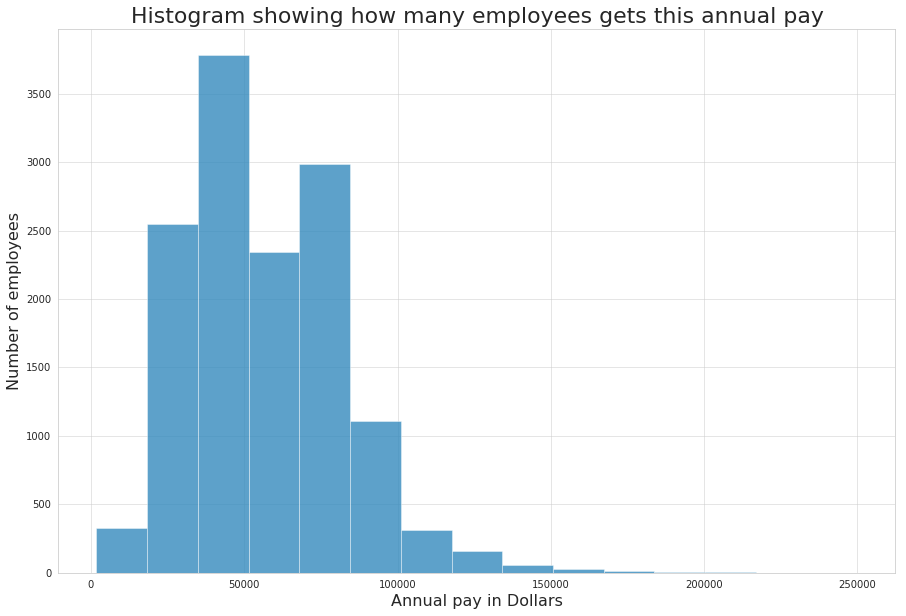

In [65]:
plt.style.use('bmh')
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
salary_df['ANNUAL_RT'].plot.hist(bins=15,alpha=.8)
plt.title("Histogram showing how many employees gets this annual pay",fontsize=22)
plt.xlabel("Annual pay in Dollars",fontsize=16)
plt.ylabel("Number of employees",fontsize=16)
plt.show()

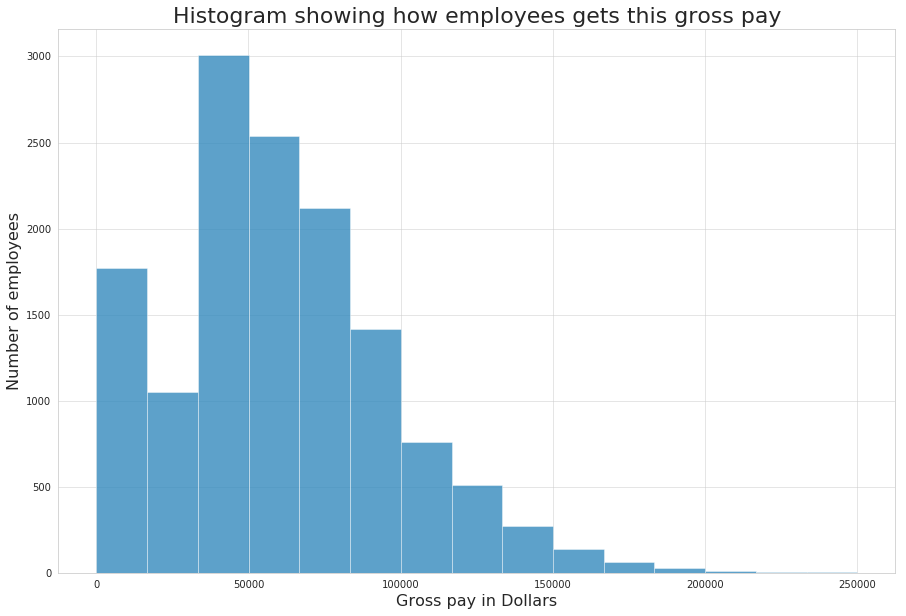

In [66]:
plt.figure(figsize=(15,10))
salary_df['GROSS'].plot.hist(bins=15,alpha=.8)
plt.title("Histogram showing how employees gets this gross pay",fontsize=22)
plt.xlabel("Gross pay in Dollars",fontsize=16)
plt.ylabel("Number of employees",fontsize=16)
plt.show()

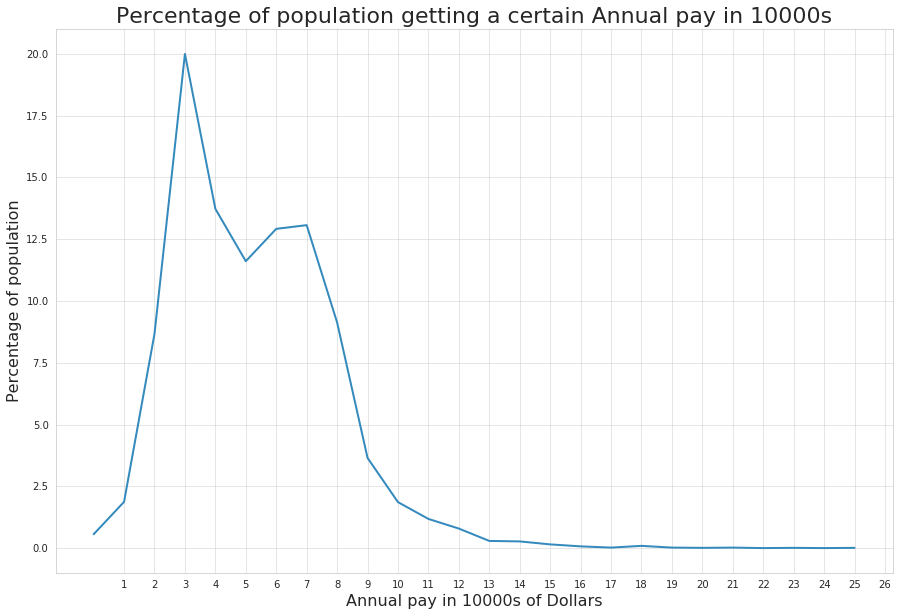

In [67]:
import numpy as np
salary_in_thousands_df = (salary_df['ANNUAL_RT']/1000).to_frame()
freq_count = []
for i in range(0, 26):
    freq_count.append(0)
for salary in salary_in_thousands_df['ANNUAL_RT']:
    freq_count[int(salary/10)] += 1
freq_percent = []
for i in range(0, 26):
    freq_percent.append(round(freq_count[i]/len(salary_df['ANNUAL_RT'])*100, 2))
freq_df = pd.DataFrame({'freq':freq_percent})
plt.figure(figsize=(15,10))
freq_df['freq'].plot(kind='line')
plt.xticks(np.arange(1,27))
plt.title("Percentage of population getting a certain Annual pay in 10000s",fontsize=22)
plt.xlabel("Annual pay in 10000s of Dollars",fontsize=16)
plt.ylabel("Percentage of population",fontsize=16)
plt.show()

### Key claim: Baltimore City Government does not have high income inequality

* **Both annual and gross pay follow a power law curve.**
    * Also called the **long tail** is a characteristic that is sometimes observed in statistical distributions.
    * In such a distribution a high-frequency population is followed by a low-frequency population.
    * The probability of occurrence of scenarios in the long "tail" are low.
    * Long-tail hints at a possibility of high income inequality.


* It is expected that the salaries paid by any organization would follow a pattern:
    * Most valuable employee will get highest salary.
    * Novice employee will get low salary. 
    * Most other employees will get close to mean salary. 


* **This graph shows that Baltimore City Government is no exception to this phenomenon.**


* Next, I will process the salary data to look at income ratio between top 0.01% and bottom 99.99% employees to prove determine if there is high income inequality...

In [68]:
"""
Frequency percentage list is now reversed. 
Let's find the index splitting at which will allow computation of salary for top paid 0.01% of 
employees in Baltimore City Government.
"""
count_percent = len(freq_percent)
temp_copy = freq_percent.copy()
new_percent_list = []
for i in range(count_percent):
    new_percent_list.append(temp_copy.pop())
cumulative_sum_list = np.cumsum(new_percent_list, dtype=float)
print([round(cmsum,2) for cmsum in cumulative_sum_list])

[0.01, 0.01, 0.02, 0.02, 0.040000000000000001, 0.050000000000000003, 0.070000000000000007, 0.16, 0.17999999999999999, 0.25, 0.40000000000000002, 0.67000000000000004, 0.95999999999999996, 1.75, 2.9300000000000002, 4.79, 8.4399999999999995, 17.57, 30.640000000000001, 43.560000000000002, 55.170000000000002, 68.900000000000006, 88.900000000000006, 97.569999999999993, 99.439999999999998, 100.0]


To find salary of top 1 percent most paid employees let's sum up salaries till index 2 in the reverse list or index 25 of the frequency list

In [69]:
split_index=25
freq_cumulative_sum_list_count=1
top_1_perccent_salary = 0
employees_in_top_1_percent = 0
bottom_99_perccent_salary = 0
employees_in_bottom_99_percent = 0
for salary in salary_in_thousands_df['ANNUAL_RT']:
    if int(salary/10) >= split_index:
        top_1_perccent_salary += salary*1000
        employees_in_top_1_percent += 1
    elif int(salary/10) < split_index:
        bottom_99_perccent_salary += salary*1000
        employees_in_bottom_99_percent += 1
print("In total, the top", str(cumulative_sum_list[freq_cumulative_sum_list_count]), "percent earns:", 
      '${:,.2f}'.format(top_1_perccent_salary), 
      "\nand bottom", str(100-cumulative_sum_list[freq_cumulative_sum_list_count]), "percent earns", 
      '${:,.2f}'.format(bottom_99_perccent_salary), 
      "in Baltimore City Government.")
print("\nOn an average, each top", str(cumulative_sum_list[freq_cumulative_sum_list_count]), "percent employee earns:", 
      '${:,.2f}'.format(top_1_perccent_salary/employees_in_top_1_percent), 
      "\nand each bottom", str(100-cumulative_sum_list[freq_cumulative_sum_list_count]), "percent employee earns", 
      '${:,.2f}'.format(bottom_99_perccent_salary/employees_in_bottom_99_percent), 
      "in Baltimore City Government.")
print("\nThe top", str(cumulative_sum_list[freq_cumulative_sum_list_count]), "to bottom", 
      str(100-cumulative_sum_list[count_percent-split_index]), "income ratio in Baltimore City Government is:", 
      '{:,.3f}'.format((top_1_perccent_salary/employees_in_top_1_percent)/
                       (bottom_99_perccent_salary/employees_in_bottom_99_percent)))

In total, the top 0.01 percent earns: $250,000.00 
and bottom 99.99 percent earns $776,284,524.00 in Baltimore City Government.

On an average, each top 0.01 percent employee earns: $250,000.00 
and each bottom 99.99 percent employee earns $56,737.65 in Baltimore City Government.

The top 0.01 to bottom 99.99 income ratio in Baltimore City Government is: 4.406


**The income ratio between the top 0.01% and bottom 99.99% is 4.406**

**Baltimore City Government pays fairly well and does not have a huge income inequality when compared to the ratio for the whole state [which is at 18.9](https://www.epi.org/publication/how-unequal-is-your-state-the-ratio-between-the-average-incomes-of-the-top-1-percent-and-the-bottom-99-percent-in-each-state/)**

### Which means my key claim is valid!

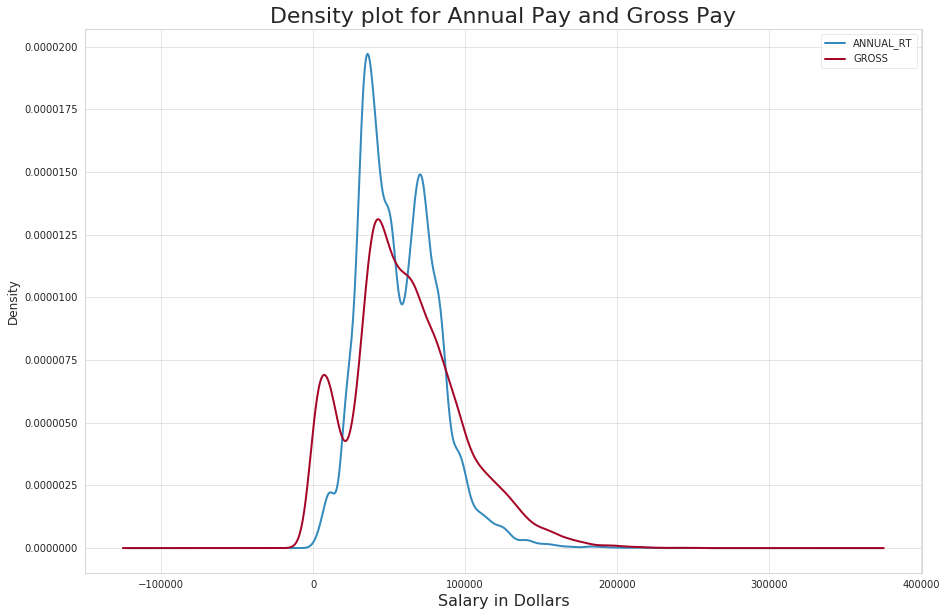

In [70]:
salary_df[['ANNUAL_RT','GROSS']].plot(kind='kde',figsize=(15,10))
plt.title('Density plot for Annual Pay and Gross Pay',fontsize=22)
plt.xlabel('Salary in Dollars',fontsize=16)
plt.show()

* Density plots are used to observe a distribution of data over a continuous interval.
* Histograms and box plots above did not clearly show the "twin peaks" characteristics observed here.
* The "twin peaks" of the salary density indicates that either there is missing data records for employee salaries or somehow Baltimore City Government has a pay jump in their salary structure!

**Average annual pay for the top ten most common jobs in Baltimore City Government**

[Link For Bar Chart](https://pythonspot.com/matplotlib-bar-chart/)

In [71]:
common_job_filter = salary_df['JOBTITLE'].value_counts().head(10).keys()
ten_most_common_job = salary_df[salary_df['JOBTITLE'].isin(common_job_filter)
                               ].groupby('JOBTITLE').mean().dropna().sort_values(['ANNUAL_RT'], ascending=True)

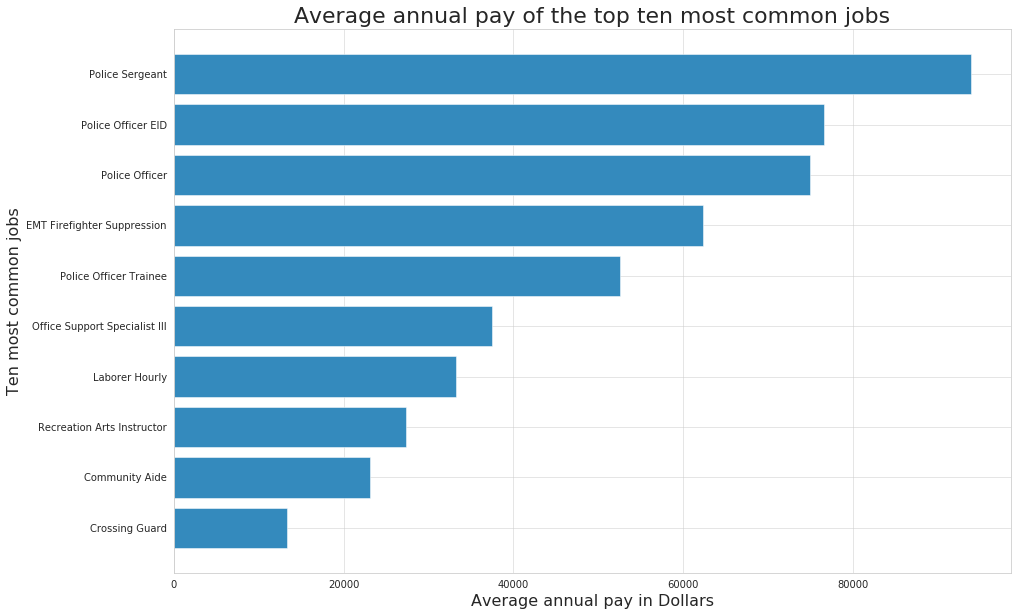

In [72]:
plt.figure(figsize=(15,10))
plt.barh(ten_most_common_job.index.values, ten_most_common_job['ANNUAL_RT'])
plt.title('Average annual pay of the top ten most common jobs',fontsize=22)
plt.xlabel('Average annual pay in Dollars',fontsize=16)
plt.ylabel('Ten most common jobs',fontsize=16)
plt.show()

**Not suprisingly, higher ranked officials for example a Police Seargeant makes more money than a Police Officer**

Jobs requiring less specialized training and experience, for example a crossing guard makes less money

**Average annual pay for departments that are the top ten employers in Baltimore City Government**

In [73]:
top_dept_filter = salary_df['DESCR'].value_counts().head(10).keys()
ten_most_common_dept = salary_df[salary_df['DESCR'].isin(top_dept_filter)
                               ].groupby('DESCR').mean().dropna().sort_values(['ANNUAL_RT'], ascending=True)

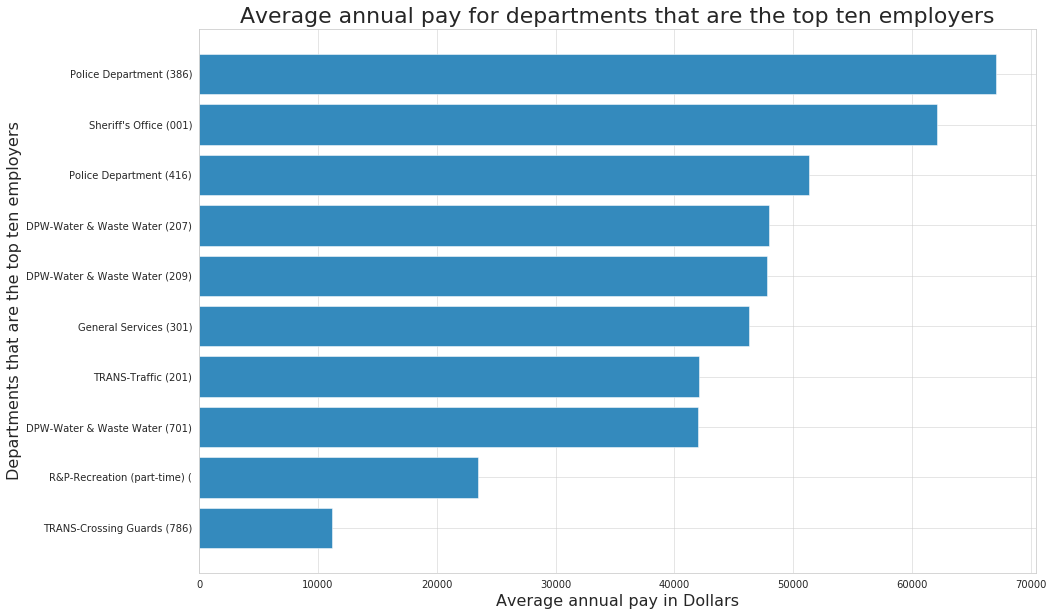

In [74]:
plt.figure(figsize=(15,10))
plt.barh(ten_most_common_dept.index.values, ten_most_common_dept['ANNUAL_RT'])
plt.title('Average annual pay for departments that are the top ten employers',fontsize=22)
plt.xlabel('Average annual pay in Dollars',fontsize=16)
plt.ylabel('Departments that are the top ten employers',fontsize=16)
plt.show()

**Once more, departments requiring more training or having potentially higher risk factors, for example the Police and Sherrif's department tend to make more money.**

In [75]:
job_wise_head_count = salary_df.groupby('JOBTITLE').count()['NAME'].sort_values(ascending=False)
top_ten_head_count_job_wise = job_wise_head_count.head(10)
top_ten_head_count_job_wise

JOBTITLE
Police Officer                   1423
Laborer Hourly                    522
Recreation Arts Instructor        381
EMT Firefighter Suppression       351
Crossing Guard                    287
Police Officer Trainee            280
Office Support Specialist III     280
Police Officer EID                278
Police Sergeant                   234
Community Aide                    224
Name: NAME, dtype: int64

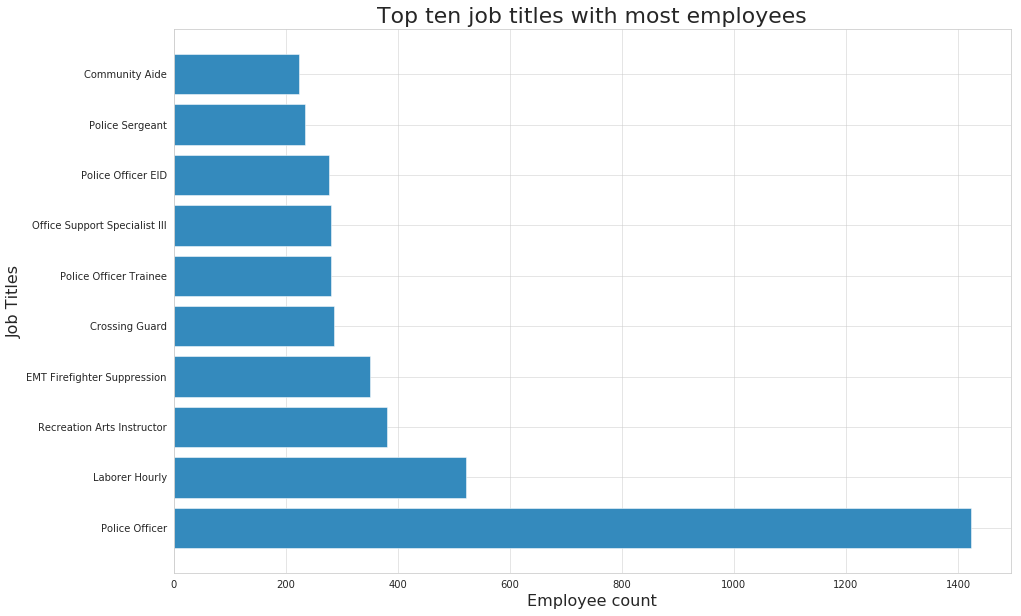

In [76]:
plt.figure(figsize=(15,10))
plt.barh(top_ten_head_count_job_wise.index.values, top_ten_head_count_job_wise)
plt.title('Top ten job titles with most employees',fontsize=22)
plt.xlabel('Employee count',fontsize=16)
plt.ylabel('Job Titles',fontsize=16)
plt.show()

**The most common job title in Baltimore City Government is that of a Police Officer.**

Given the fact that I see articles stating: ['Neighborhoods are crying out': Baltimore has highest homicide rate of U.S. big cities](https://www.baltimoresun.com/news/maryland/crime/bs-md-ci-fbi-data-20180924-story.html) the large police force is probably justified.

**In most cases, with experience people tend to receive higher salaries.**

Next, I will explore if this is true for the Baltimore City Government...

[SO help to determine difference of dates](https://stackoverflow.com/questions/8419564/difference-between-two-dates-in-python)

In [77]:
from datetime import datetime

In [78]:
def years_of_experience(d1):
    d1 = datetime.strptime(d1,"%m/%d/%Y %H:%M:%S %p")
    d2 = datetime.now()
    years_of_experience=(abs((d2 - d1).days))//365
    return int(years_of_experience)

In [79]:
"""
Looking at employees with more than 10 years of experience and not an horly laborer.
Also works as one of the top ten most common job titles.
"""
top_ten_jobs_filter = top_ten_head_count_job_wise.keys()
salary_df['YRS_OF_EXPERIENCE']=salary_df['HIRE_DT'].apply(years_of_experience)
salary_df = salary_df[salary_df['YRS_OF_EXPERIENCE'] > 10]
salary_df = salary_df[salary_df['JOBTITLE'].isin(top_ten_jobs_filter)]
salary_df = salary_df[salary_df['JOBTITLE'] != 'Laborer Hourly']

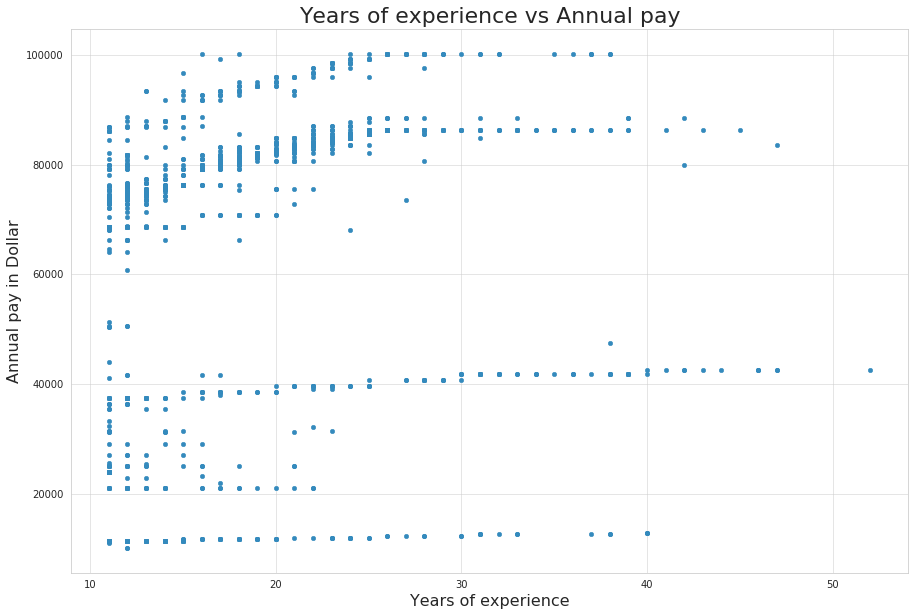

In [80]:
plt.figure(figsize=(15,10))
plt.scatter(x=salary_df['YRS_OF_EXPERIENCE'], y=salary_df['ANNUAL_RT'], cmap='coolwarm', marker='o', s=20)
plt.title('Years of experience vs Annual pay',fontsize=22)
plt.xlabel('Years of experience',fontsize=16)
plt.ylabel('Annual pay in Dollar',fontsize=16)
plt.show()

In [81]:
salary_df.corr()

,ANNUAL_RT,GROSS,YRS_OF_EXPERIENCE
ANNUAL_RT,1.000000,0.874710,0.194875
GROSS,0.874710,1.000000,0.195895
YRS_OF_EXPERIENCE,0.194875,0.195895,1.000000


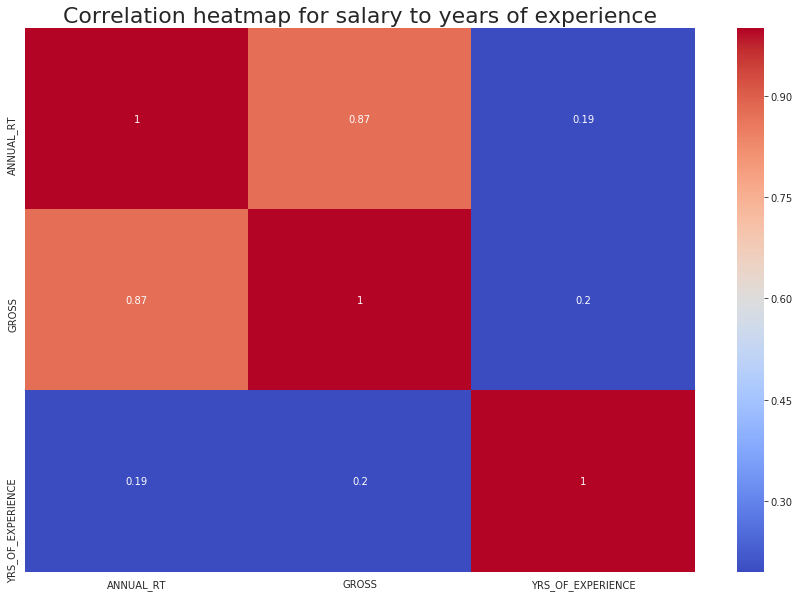

In [82]:
plt.figure(figsize=(15,10))
sns.heatmap(salary_df.corr(),cmap='coolwarm',annot=True)
plt.scatter(x=salary_df['YRS_OF_EXPERIENCE'], y=salary_df['ANNUAL_RT'], cmap='coolwarm', marker='o', s=20)
plt.title('Correlation heatmap for salary to years of experience',fontsize=22)
plt.show()

**There is low correlation between the generated field of *"years of experience"* and annual pay. This is possible because our assumption that hire date would reflect actual experience is untrue.**

In [83]:
print('Total Time taken:',time.time() - start_time,'seconds')

Total Time taken: 12.085855484008789 seconds


## Final conclusions from data characterization project of Baltimore City Government salaries

While working on this project I learned how to explore data, find anomalies in datasets, cleanup data and fill up missing data points, if necessary.

I also learned how to perform a number of different visualization techniques and utilize them to characterize the inherent properties of an unknown dataset.

I learned that data headers can be misleading and lead to prejudices but visualizations can help us correct our inferences.

**My key conclusion from the project is: Baltimore City Government is a fair wage payer and does not create drastic income inequality.**

I observed that **both annual and gross pay exhibit "long-tail" characteristics** i.e., there are few "very high" or "very low" salaries. This led me to the next logical step of determining the ratio of average income for the top 0.01 to bottom 99.99 employees. This came out to 4.406 which when compared to the ratio of [18.9](https://www.epi.org/publication/how-unequal-is-your-state-the-ratio-between-the-average-incomes-of-the-top-1-percent-and-the-bottom-99-percent-in-each-state/) for the whole state, seems to be fairly low.

Other conclusions drawn from the analysis and characterization:
* "Police Officer" is the most common job title and number of officers employed by the government is almost three times the number of next most number of employees by job title. Given that I frequently see articles like this: ['Neighborhoods are crying out': Baltimore has highest homicide rate of U.S. big cities](https://www.baltimoresun.com/news/maryland/crime/bs-md-ci-fbi-data-20180924-story.html), it is not surprising Baltimore City has a large police force. 
* The average pay for the top, most common job, seem to have taken into account the specialized training, skills required and risks involved. For example, employees in the Police and Sherrif's department tend to make more money than the Crossing Guard.
* There is a salary jump in both annual and gross pay in salary structure for the Baltimore City Government, as seen via the "twin peaks" characteristic in salary density plots. It could also be possible that there are missing data records in this dataset.
* There seems to be very little correlation between the computed field of *"years of experience"* and annual pay. This could have happened because the hire date does not represent actual experience. Someone who was recently hired could have years of experience with another organization.